# Lead Score Case Study 

**Done by Subhangi Dogra**

## First step is to clean the data

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1]:
#Reading Data
leads = pd.read_csv('Leads.csv')
leads.head()

NameError: name 'pd' is not defined

In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking total of nulls in all features.
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, axis = 1, inplace=True)


In [8]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

**variable City and Country won't be of any use so we drop it.**

In [9]:
leads.drop(['City','Country'], axis = 1, inplace = True)

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [10]:
#check the missing values in each column

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [11]:
# Get the value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

**few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.**

In [12]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [13]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

**Above two variables have a very large amount of 'Select' hence they are of no use to us. Hnce we will drop them.**

In [14]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

**many variable have a majority of No values than Yes values. Basically these values do not provide us with any infomation about the leads. Hence it is best if we drop such variables.**

In [15]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

**there is a big difference between the no of values in 'What matters most to you in choosing a course' Hence we should drop it as well**

In [16]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [17]:
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

**'What is your current occupation','TotalVisits','Lead Source','Specialization' has many null value but it is an important feature as it would dictate the choosing of specialization for the leads.**

In [18]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [19]:
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [20]:
leads = leads[~pd.isnull(leads['Lead Source'])]

In [21]:
leads = leads[~pd.isnull(leads['Specialization'])]

In [22]:
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [23]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


**We wont be needing ProspectID and LeadNumber in our Analysis. Hence we shall remove it right away.**

In [24]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

**Converting Yes/No values into 1/0 values**

In [25]:
varlist = ['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes':1 ,'No': 0})
leads[varlist] = leads[varlist].apply(binary_map)

In [26]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


## Now that we have finished cleaning the data we shall move onto Data Modelling 

**Dummy Variable creation**

In [27]:
#Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [28]:
# Create dummy variables for the above Categorical variables except for Specialization
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

In [29]:
# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

**As Specialization feature has 'Select' level in it, we shall remove it first.**

In [30]:
spec = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
spec = spec.drop(['Specialization_Select'], 1)

**Adding it to main df**

In [31]:
leads = pd.concat([leads, spec], axis = 1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0


**Dropping the extra variables for which dummie are present.**

In [32]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Train - Test Split:-

**'Converted' is the Target Variable here.**

In [33]:
X = leads.drop(['Converted'], axis=1)
y = leads['Converted']

In [34]:
X

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.00,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,5.0,210,2.50,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9235,8.0,1845,2.67,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9236,2.0,238,2.00,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9237,2.0,199,2.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9234    1
9235    1
9236    0
9237    0
9239    1
Name: Converted, Length: 6373, dtype: int64

In [36]:
#splitting Data
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3, random_state=100)

In [37]:
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,4.0,67,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,4.0,187,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,6.0,78,6.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,7.0,1633,3.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5877,3.0,1709,3.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8658,4.0,425,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Scaling:-

In [38]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**we need to scale the variables which have many value except 0 and 1 in order to get a good and readable model.**

In [39]:
# checking the convert rate
convert = sum(leads.Converted)/len(leads.Converted)*100
convert

48.093519535540565

**Convert rate is not balanced but not heavily imbalanced as  well**

**Lets look at Correlations:-**

<AxesSubplot:>

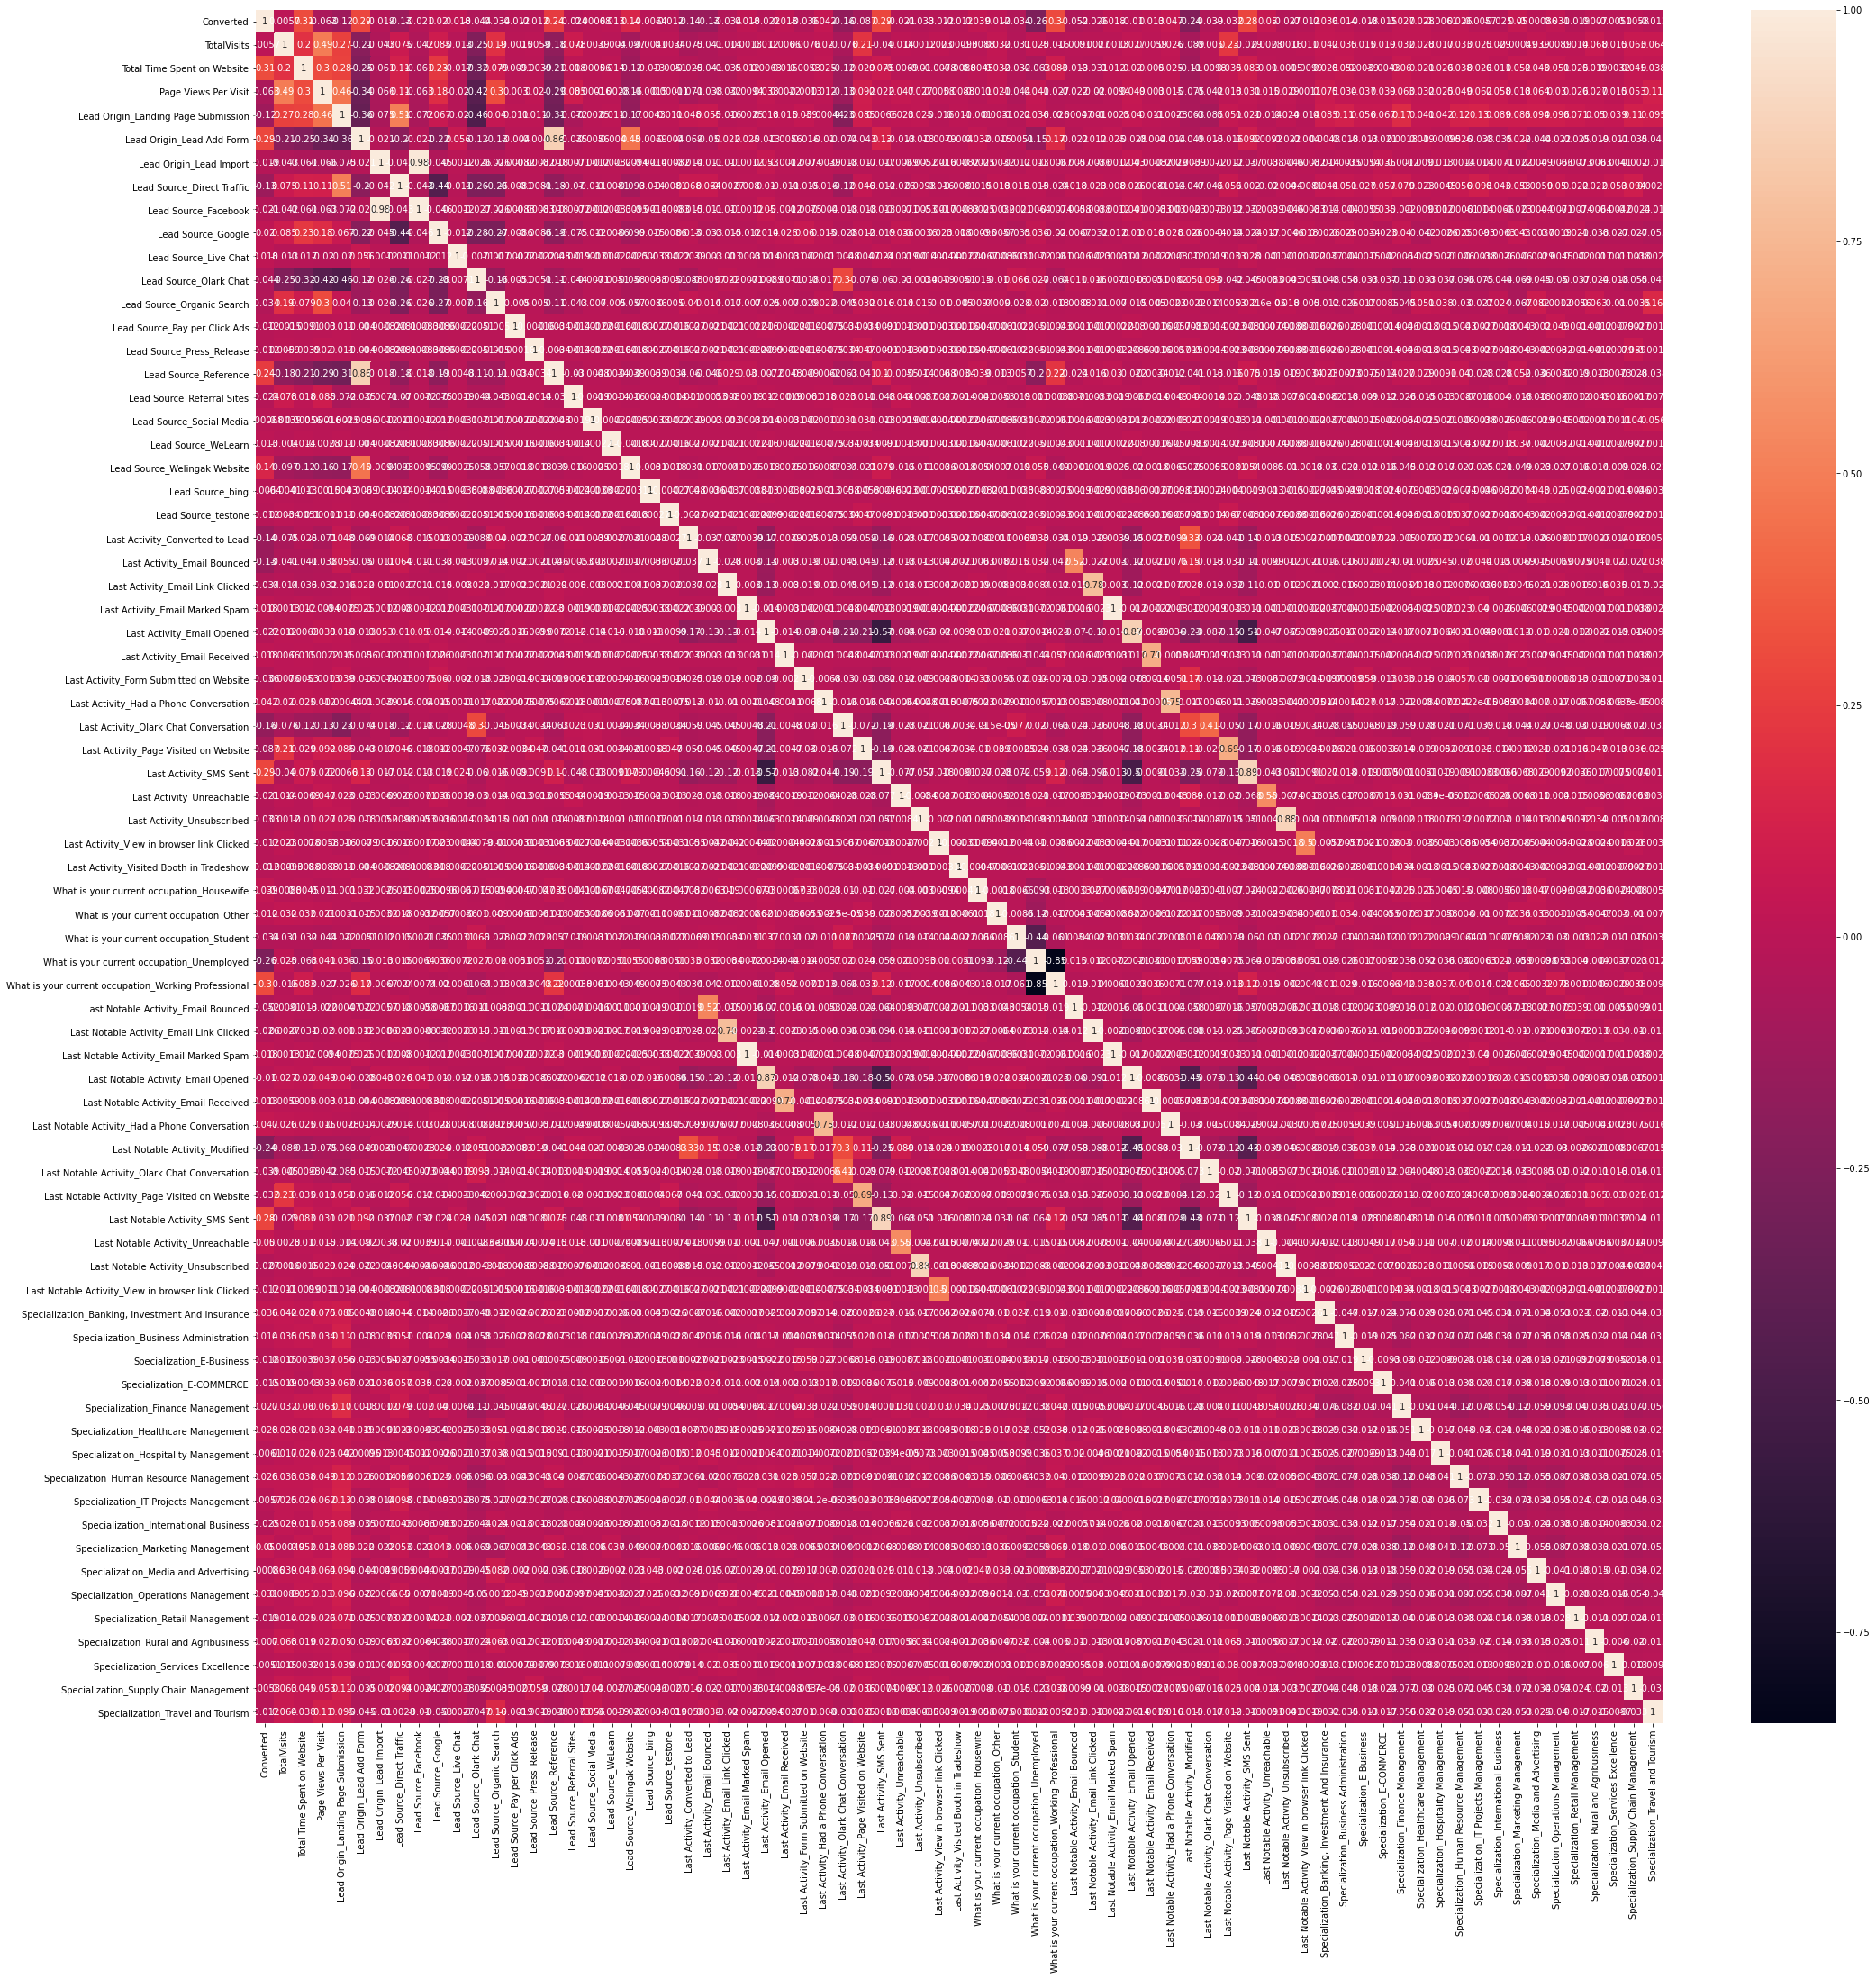

In [40]:
plt.figure(figsize=(35,35))
sns.heatmap(leads.corr(),annot=True)

**Checking corr of all features with Target Variable i.e. 'Converted'**

In [41]:
corr_matrix = leads.corr()
print(corr_matrix["Converted"].sort_values())

What is your current occupation_Unemployed             -0.259722
Last Notable Activity_Modified                         -0.239572
Last Activity_Olark Chat Conversation                  -0.164168
Last Activity_Converted to Lead                        -0.138834
Last Activity_Email Bounced                            -0.134838
                                                          ...   
Last Activity_SMS Sent                                  0.285854
Lead Origin_Lead Add Form                               0.288666
What is your current occupation_Working Professional    0.304859
Total Time Spent on Website                             0.313338
Converted                                               1.000000
Name: Converted, Length: 73, dtype: float64


## RFE Feature Selection:-

In [42]:
logreg = LogisticRegression()
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', False, 37),
 ('Last Activity_Converted to Lead', False, 26),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 54),
 ('Last Acti

In [44]:
col = X_train.columns[rfe.support_]


In [45]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [46]:
X_train = X_train[col]

In [47]:
#Assessing model with Statsmodels

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.4
Date:                Tue, 10 May 2022   Deviance:                       4188.8
Time:                        13:28:50   Pearson chi2:                 4.92e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0318      0.610     -1.692      0.091      -2.227       0.163
TotalVisits                                              9.6750      2.784      3.476      0.001       4.219      15.131
Total Time Spent on Website                              4.4599      0.184     24.201      0.000       4.099       4.821
Lead Origin_Lead Add Form                                2.9836      1.187      2.513      0.012       0.657       5.311
Lead Source_Olark Chat                                   1.4640      0.122     11.997      0.000       1.225       1.703
Lead Source_Reference                                    1.2246      1.210      1.012      0.312      -1.147       3.596
Lead Source_Welingak Website                             3.2963      1.555      2.120      0.034       0.249       6.343
Last Activity_Email Bounced                             -1.6916      0.366     -4.625      0.000      -2.409      -0.975
Last Activity_Had a Phone Conversation                   1.0754      0.984      1.093      0.274      -0.853       3.004
Last Activity_SMS Sent                                   1.1088      0.082     13.585      0.000       0.949       1.269
What is your current occupation_Housewife               22.6894   2.45e+04      0.001      0.999   -4.79e+04     4.8e+04
What is your current occupation_Student                 -1.1259      0.639     -1.762      0.078      -2.379       0.127
What is your current occupation_Unemployed              -1.3232      0.604     -2.190      0.029      -2.507      -0.139
What is your current occupation_Working Professional     1.2999      0.633      2.055      0.040       0.060       2.540
Last Notable Activity_Had a Phone Conversation          23.2092   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Last Notable Activity_Unreachable                        2.8181      0.807      3.491      0.000       1.236       4.400
========================================================================================================================
"""

**Checking VIF**

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.18
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.61
12,What is your current occupation_Working Profes...,1.57


**3 variables have a very high VIF**

In [49]:
# Lets remove Lead Source_Reference as it has high VIF as well as high p-value

X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [50]:
# Refitting the model

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.8
Date:                Tue, 10 May 2022   Deviance:                       4189.7
Time:                        13:28:51   Pearson chi2:                 4.90e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0312      0.610     -1.692      0.091      -2.226       0.164
TotalVisits                                              9.6751      2.784      3.476      0.001       4.219      15.131
Total Time Spent on Website                              4.4600      0.184     24.200      0.000       4.099       4.821
Lead Origin_Lead Add Form                                4.1703      0.258     16.139      0.000       3.664       4.677
Lead Source_Olark Chat                                   1.4640      0.122     11.996      0.000       1.225       1.703
Lead Source_Welingak Website                             2.1096      1.036      2.036      0.042       0.079       4.141
Last Activity_Email Bounced                             -1.6917      0.366     -4.625      0.000      -2.409      -0.975
Last Activity_Had a Phone Conversation                   1.0753      0.984      1.093      0.274      -0.853       3.004
Last Activity_SMS Sent                                   1.1087      0.082     13.583      0.000       0.949       1.269
What is your current occupation_Housewife               22.6911   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1253      0.639     -1.761      0.078      -2.378       0.127
What is your current occupation_Unemployed              -1.3237      0.604     -2.191      0.028      -2.508      -0.140
What is your current occupation_Working Professional     1.3004      0.633      2.056      0.040       0.061       2.540
Last Notable Activity_Had a Phone Conversation          23.2095   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
Last Notable Activity_Unreachable                        2.8184      0.807      3.492      0.000       1.236       4.400
========================================================================================================================
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.61
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


**The VIFs seem to be in acceptable range i.e. below 5. Hence we will now remove features one by one which have p-value >0.05**

In [52]:
#removing Last Notable Activity_Had a Phone Conversation from fetures as it has very high p-value

X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [53]:
# Refitting the model

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.7
Date:                Tue, 10 May 2022   Deviance:                       4195.5
Time:                        13:28:51   Pearson chi2:                 4.91e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0332      0.609     -1.695      0.090      -2.228       0.161
TotalVisits                                              9.8018      2.787      3.517      0.000       4.340      15.263
Total Time Spent on Website                              4.4525      0.184     24.176      0.000       4.092       4.813
Lead Origin_Lead Add Form                                4.1704      0.258     16.139      0.000       3.664       4.677
Lead Source_Olark Chat                                   1.4640      0.122     11.995      0.000       1.225       1.703
Lead Source_Welingak Website                             2.1095      1.036      2.036      0.042       0.078       4.141
Last Activity_Email Bounced                             -1.6906      0.366     -4.623      0.000      -2.407      -0.974
Last Activity_Had a Phone Conversation                   2.8017      0.802      3.494      0.000       1.230       4.373
Last Activity_SMS Sent                                   1.1086      0.082     13.586      0.000       0.949       1.269
What is your current occupation_Housewife               21.6929   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1232      0.639     -1.758      0.079      -2.375       0.129
What is your current occupation_Unemployed              -1.3218      0.604     -2.189      0.029      -2.505      -0.138
What is your current occupation_Working Professional     1.3003      0.632      2.056      0.040       0.061       2.540
Last Notable Activity_Unreachable                        2.8174      0.807      3.491      0.000       1.235       4.399
========================================================================================================================
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.61
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
9,What is your current occupation_Student,1.09
5,Last Activity_Email Bounced,1.05


In [55]:
#removing What is your current occupation_Housewife from fetures as it has very high p-value

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [56]:
# Refitting the model

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.0
Date:                Tue, 10 May 2022   Deviance:                       4200.0
Time:                        13:28:52   Pearson chi2:                 4.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4561      0.558     -0.817      0.414      -1.551       0.638
TotalVisits                                              9.5775      2.773      3.454      0.001       4.143      15.012
Total Time Spent on Website                              4.4513      0.184     24.179      0.000       4.090       4.812
Lead Origin_Lead Add Form                                4.1675      0.258     16.136      0.000       3.661       4.674
Lead Source_Olark Chat                                   1.4586      0.122     11.966      0.000       1.220       1.698
Lead Source_Welingak Website                             2.1078      1.036      2.034      0.042       0.077       4.139
Last Activity_Email Bounced                             -1.6917      0.366     -4.626      0.000      -2.408      -0.975
Last Activity_Had a Phone Conversation                   2.8034      0.802      3.497      0.000       1.232       4.375
Last Activity_SMS Sent                                   1.1082      0.082     13.583      0.000       0.948       1.268
What is your current occupation_Student                 -1.6956      0.592     -2.863      0.004      -2.856      -0.535
What is your current occupation_Unemployed              -1.8940      0.554     -3.417      0.001      -2.980      -0.808
What is your current occupation_Working Professional     0.7277      0.585      1.244      0.214      -0.419       1.874
Last Notable Activity_Unreachable                        2.8147      0.807      3.486      0.000       1.232       4.397
========================================================================================================================
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.64
1,Total Time Spent on Website,2.36
2,Lead Origin_Lead Add Form,1.70
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.61
10,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.43
4,Lead Source_Welingak Website,1.33
8,What is your current occupation_Student,1.09
5,Last Activity_Email Bounced,1.05


In [58]:
#removing What is your current occupation_Working Professional from fetures as it has very high p-value

X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [59]:
# Refitting the model

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2100.7
Date:                Tue, 10 May 2022   Deviance:                       4201.5
Time:                        13:28:52   Pearson chi2:                 4.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2044      0.196      1.042      0.297      -0.180       0.589
TotalVisits                                    9.4577      2.766      3.419      0.001       4.037      14.879
Total Time Spent on Website                    4.4526      0.184     24.184      0.000       4.092       4.813
Lead Origin_Lead Add Form                      4.1672      0.258     16.137      0.000       3.661       4.673
Lead Source_Olark Chat                         1.4582      0.122     11.969      0.000       1.219       1.697
Lead Source_Welingak Website                   2.1066      1.036      2.033      0.042       0.076       4.138
Last Activity_Email Bounced                   -1.6834      0.365     -4.616      0.000      -2.398      -0.969
Last Activity_Had a Phone Conversation         2.8075      0.802      3.502      0.000       1.236       4.379
Last Activity_SMS Sent                         1.1117      0.081     13.644      0.000       0.952       1.271
What is your current occupation_Student       -2.3554      0.280     -8.420      0.000      -2.904      -1.807
What is your current occupation_Unemployed    -2.5542      0.186    -13.761      0.000      -2.918      -2.190
Last Notable Activity_Unreachable              2.8162      0.807      3.488      0.000       1.234       4.399
==============================================================================================================
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.81
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.52
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
8,What is your current occupation_Student,1.07
5,Last Activity_Email Bounced,1.04
6,Last Activity_Had a Phone Conversation,1.01


**As we can see both the VIFs and p-values are in acceptable range hencewe can moe to next step**

## Model Evaluation:-

In [61]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.276801
218     0.137801
4171    0.122330
4037    0.290917
3660    0.950830
207     0.188550
2044    0.175148
6411    0.952086
6498    0.063413
2085    0.980638
dtype: float64

In [62]:
#reshaping above

y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([0.27680093, 0.13780119, 0.12233007, 0.29091684, 0.95082954,
       0.18855042, 0.17514754, 0.95208603, 0.06341307, 0.98063814])

In [63]:
#Creating a df with actual converted flag and predicted probability

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.276801
1,0,0.137801
2,1,0.122330
3,1,0.290917
4,1,0.950830


**Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0**

In [64]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.276801,0
1,0,0.137801,0
2,1,0.122330,0
3,1,0.290917,0
4,1,0.950830,1


In [65]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 563 1586]]


**Checking overall accuracy**

In [66]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.787939923783905


In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Calculate the sensitivity

TP/(TP+FN)

0.7380176826430898

In [69]:
TN/(TN+FP)

0.8343425605536332

**ROC**

In [70]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

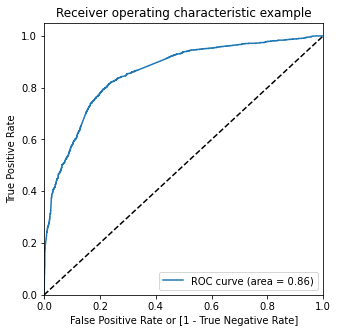

In [72]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**The area under the curve of the ROC is 0.86.So we seem to have a good model.**

**Checking the sensitivity and specificity tradeoff to find the optimal cutoff point.**

In [73]:
# creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.276801,0,1,1,1,0,0,0,0,0,0,0
1,0,0.137801,0,1,1,0,0,0,0,0,0,0,0
2,1,0.122330,0,1,1,0,0,0,0,0,0,0,0
3,1,0.290917,0,1,1,1,0,0,0,0,0,0,0
4,1,0.950830,1,1,1,1,1,1,1,1,1,1,1


In [74]:
# creating a df to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.513562  0.991624  0.069204
0.2   0.2  0.691997  0.946952  0.455017
0.3   0.3  0.766196  0.863658  0.675606
0.4   0.4  0.789285  0.802699  0.776817
0.5   0.5  0.787940  0.738018  0.834343
0.6   0.6  0.756333  0.622150  0.881055
0.7   0.7  0.733020  0.537925  0.914360
0.8   0.8  0.710155  0.448581  0.953287
0.9   0.9  0.643578  0.279200  0.982266


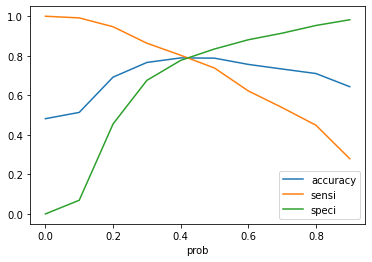

In [76]:
# plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Choosing 0.42 as our cutoff .**

In [77]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.276801,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.137801,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.122330,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.290917,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.950830,1,1,1,1,1,1,1,1,1,1,1,1


In [78]:
#check accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.790405738623627

In [79]:
# creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1832,  480],
       [ 455, 1694]], dtype=int64)

In [80]:

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [81]:
# Calculate Sensitivity

TP/(TP+FN)

0.7882736156351792

In [82]:
# Calculate Specificity

TN/(TN+FP)

0.7923875432525952

**this is very accurate than earlier**
**Hence we keep this cutoff point.**

## Making Predictions on the Test Set


In [83]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [84]:
X_test = X_test[col]
X_test.head()


,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,0,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [85]:
X_test_sm = sm.add_constant(X_test[col])

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,0,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,0,0,1,0,0,1,0,0,0


In [86]:
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [87]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [88]:
y_test_pred[:10]

4771    0.996261
6122    0.123949
9202    0.682881
6570    0.636379
2668    0.695306
4233    0.944853
3368    0.704093
9091    0.451597
5972    0.262776
3631    0.768901
dtype: float64

In [89]:
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
4771,0.996261
6122,0.123949
9202,0.682881
6570,0.636379
2668,0.695306


In [90]:
y_test_df = pd.DataFrame(y_test)

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [91]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,0
0,1,0.996261
1,0,0.123949
2,0,0.682881
3,1,0.636379
4,1,0.695306


In [92]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})

y_pred_final.head()

,Converted,Converted_Prob
0,1,0.996261
1,0,0.123949
2,0,0.682881
3,1,0.636379
4,1,0.695306


In [93]:
# Making predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [94]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.996261,1
1,0,0.123949,0
2,0,0.682881,1
3,1,0.636379,1
4,1,0.695306,1


In [95]:
#checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7897489539748954

In [96]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[795, 201],
       [201, 715]], dtype=int64)

In [97]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [98]:
# Calculate sensitivity
TP / float(TP+FN)

0.7805676855895196

In [99]:
# Calculate specificity
TN / float(TN+FP)

0.7981927710843374

# Precision-Recall View

In [100]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 563, 1586]], dtype=int64)

In [101]:
# Calculate Precision
#TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8054850177755206

In [102]:
#Recall TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7380176826430898

## Precision and recall tradeoff

In [103]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [104]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

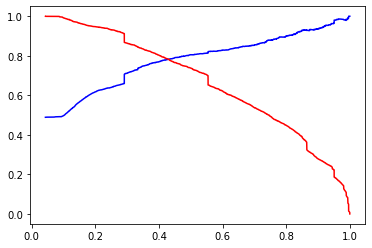

In [105]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [106]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.276801,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.137801,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.122330,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.290917,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.950830,1,1,1,1,1,1,1,1,1,1,1,1


In [107]:
# Checking accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7886124187401928

In [108]:
#creating confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1857,  455],
       [ 488, 1661]], dtype=int64)

In [109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
# Calculate Precision

TP/(TP+FP)

0.7849716446124764

In [111]:
# Calculate Recall

TP/(TP+FN)

0.7729176361098186